In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl

In [3]:
df = pd.read_csv('./bench_20230920_112700.txt')

In [4]:
df.head()

,tol,OriginalSizeInByte,CompressedSizeInByte,CompRatio,avg_load_time,std_dev_load_time,load_throughput,avg_comp_time,std_dev_comp_time,comp_throughput,avg_decomp_time,std_dev_decomp_time,decomp_throughput,devName
0,0.00001,1048576,1092823,0.959511,0.009225,0.0,1.136710e+08,0.047117,0.005417,2.225458e+07,0.076628,0.003130,1.368397e+07,gpu
1,0.00001,2097152,1995871,1.050745,0.009337,0.0,2.245964e+08,0.046323,0.002316,4.527192e+07,0.066943,0.002487,3.132746e+07,gpu
2,0.00001,4194304,2949559,1.422011,0.016567,0.0,2.531687e+08,0.048119,0.002807,8.716569e+07,0.069146,0.001938,6.065874e+07,gpu
3,0.00001,8388608,4882711,1.718023,0.022575,0.0,3.715900e+08,0.060730,0.001398,1.381289e+08,0.078365,0.003156,1.070450e+08,gpu
4,0.00001,16777216,9677275,1.733672,0.036947,0.0,4.540886e+08,0.088085,0.003117,1.904663e+08,0.088449,0.003744,1.896825e+08,gpu


In [5]:
df["comp_bw"] = df["comp_throughput"]/1024/1024
df["decomp_bw"] = df["decomp_throughput"]/1024/1024

In [6]:
df_gpu = df[df["devName"]=="gpu"]

In [7]:
df_gpu["OriginalMB"] = df_gpu["OriginalSizeInByte"]/1024/1024
df_gpu["CompressedMB"] = df_gpu["CompressedSizeInByte"]/1024/1024

/tmp/ipykernel_362233/254387590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpu["OriginalMB"] = df_gpu["OriginalSizeInByte"]/1024/1024
/tmp/ipykernel_362233/254387590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpu["CompressedMB"] = df_gpu["CompressedSizeInByte"]/1024/1024


In [8]:
df_gpu.drop(["decomp_throughput","comp_throughput"],axis=1)

,tol,OriginalSizeInByte,CompressedSizeInByte,CompRatio,avg_load_time,std_dev_load_time,load_throughput,avg_comp_time,std_dev_comp_time,avg_decomp_time,std_dev_decomp_time,devName,comp_bw,decomp_bw,OriginalMB,CompressedMB
0,0.00001,1048576,1092823,0.959511,0.009225,0.0,1.136710e+08,0.047117,0.005417,0.076628,0.003130,gpu,21.223621,13.050052,1.0,1.042197
1,0.00001,2097152,1995871,1.050745,0.009337,0.0,2.245964e+08,0.046323,0.002316,0.066943,0.002487,gpu,43.174669,29.876194,2.0,1.903411
2,0.00001,4194304,2949559,1.422011,0.016567,0.0,2.531687e+08,0.048119,0.002807,0.069146,0.001938,gpu,83.127678,57.848679,4.0,2.812919
3,0.00001,8388608,4882711,1.718023,0.022575,0.0,3.715900e+08,0.060730,0.001398,0.078365,0.003156,gpu,131.729964,102.086070,8.0,4.656516
4,0.00001,16777216,9677275,1.733672,0.036947,0.0,4.540886e+08,0.088085,0.003117,0.088449,0.003744,gpu,181.642863,180.895365,16.0,9.228969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,1.00000,268435456,8593779,31.236020,0.368494,0.0,7.284672e+08,0.745824,0.036442,0.451858,0.006987,gpu,343.244656,566.549912,256.0,8.195666
165,1.00000,536870912,17055515,31.477848,0.638340,0.0,8.410429e+08,1.405828,0.036604,0.833751,0.023206,gpu,364.198119,614.092361,512.0,16.265407
166,1.00000,1073741824,34231291,31.367261,1.170434,0.0,9.173878e+08,2.808277,0.073226,1.598292,0.036680,gpu,364.636440,640.683821,1024.0,32.645503
167,1.00000,2147483648,68238195,31.470405,2.101585,0.0,1.021840e+09,5.453679,0.110285,3.187187,0.064291,gpu,375.526330,642.572943,2048.0,65.077014


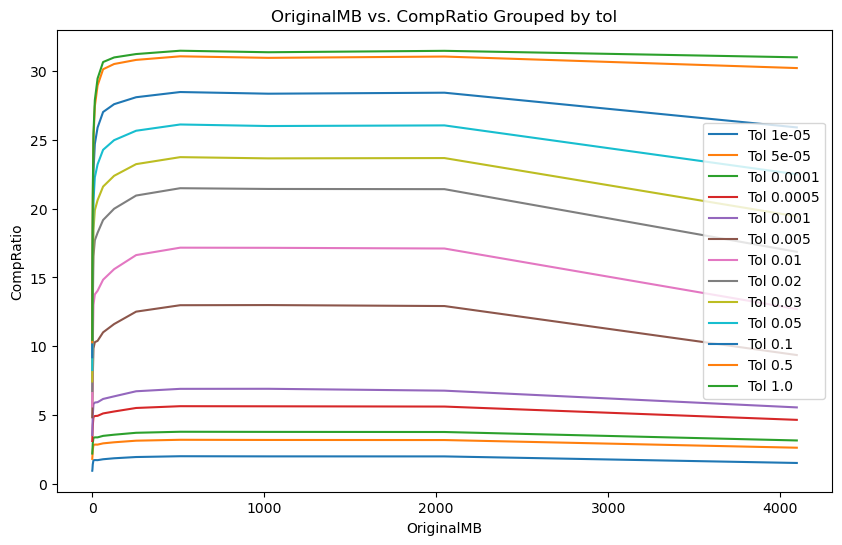

In [9]:

# Group the data by 'tol'
grouped_data = df_gpu.groupby('tol')

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each group and plot the data
for tol, group in grouped_data:
    ax.plot(group['OriginalMB'], group['CompRatio'], label=f'Tol {tol}')

# Add labels and a legend
ax.set_xlabel('OriginalMB')
ax.set_ylabel('CompRatio')
ax.set_title('OriginalMB vs. CompRatio Grouped by tol')
ax.legend()

# Show the plot
plt.show()

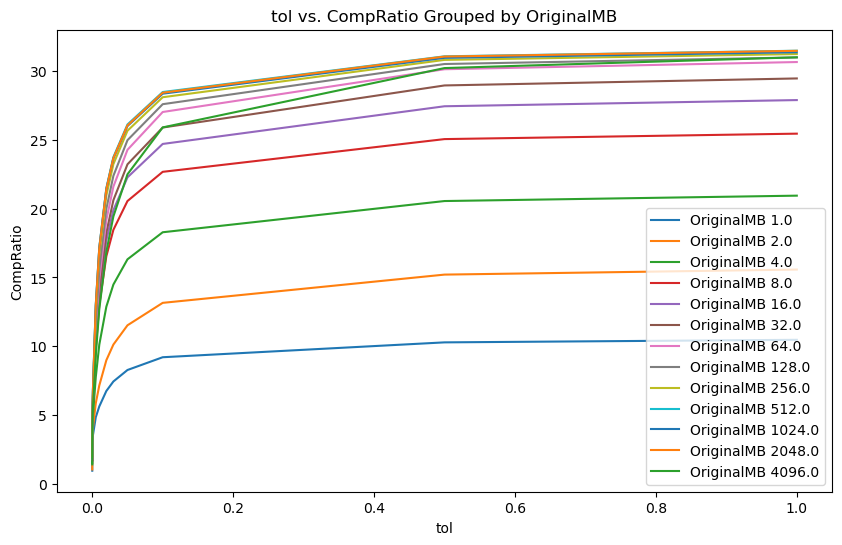

In [20]:

# Group the data by 'tol'
grouped_data = df_gpu.groupby('OriginalMB')

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each group and plot the data
for OriMB, group in grouped_data:
    ax.plot(group['tol'], group['CompRatio'], label=f'OriginalMB {OriMB}')

# Add labels and a legend
ax.set_xlabel('tol')
ax.set_ylabel('CompRatio')
ax.set_title('tol vs. CompRatio Grouped by OriginalMB')
ax.legend()

# Show the plot
plt.show()

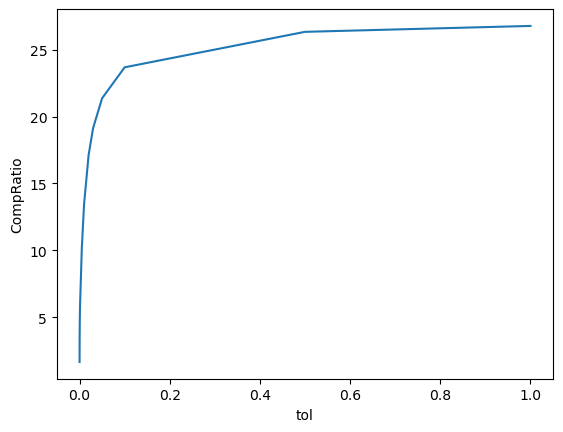

In [10]:
# Group the data by 'tol'
grouped_data = df_gpu.groupby('tol')
CompRatio = grouped_data.agg({"CompRatio":"mean"})
plt.plot(CompRatio.index,CompRatio["CompRatio"])

plt.xlabel("tol")
plt.ylabel("CompRatio")
plt.show()

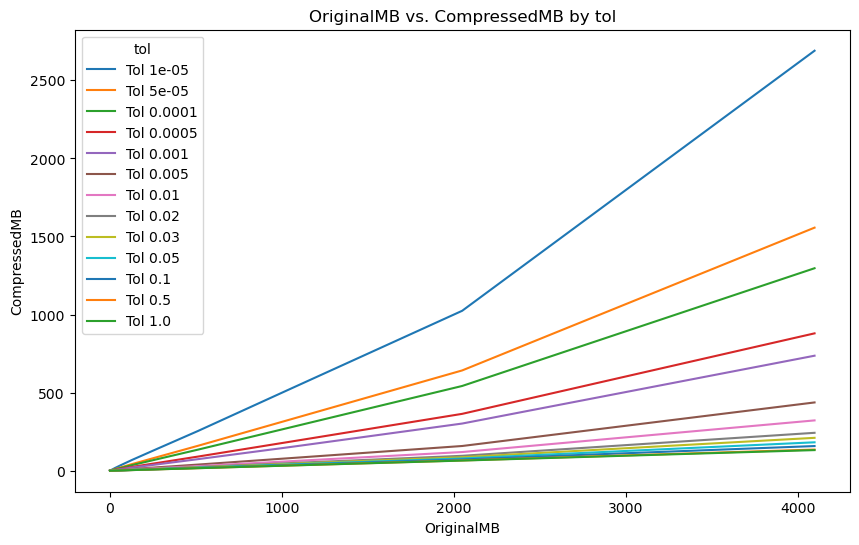

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have the 'data' DataFrame defined

# Group the data by 'tol'
grouped_data = df_gpu.groupby('tol')

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each group and plot the data
for tol, group in grouped_data:
    ax.plot(group['OriginalMB'], group['CompressedMB'], label=f'Tol {tol}')

# Add labels and a legend
ax.set_xlabel('OriginalMB')
ax.set_ylabel('CompressedMB')
ax.set_title('OriginalMB vs. CompressedMB by tol')
ax.legend(title='tol')

# Show the plot
plt.show()


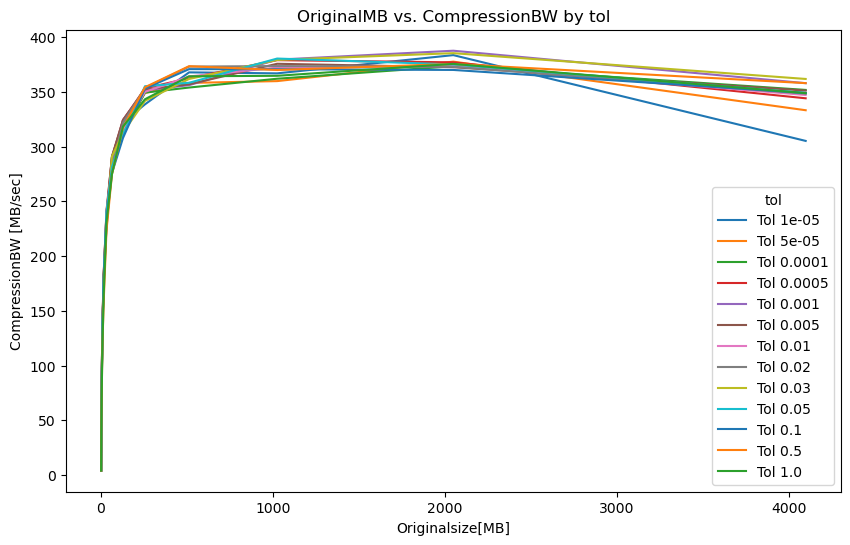

In [13]:
# Group the data by 'tol'
grouped_data = df_gpu.groupby('tol')

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each group and plot the data
for tol, group in grouped_data:
    ax.plot(group['OriginalMB'], group['comp_bw'], label=f'Tol {tol}')

# Add labels and a legend
ax.set_xlabel('Originalsize[MB]')
ax.set_ylabel('CompressionBW [MB/sec]')
ax.set_title('OriginalMB vs. CompressionBW by tol')
ax.legend(title='tol')

# Show the plot
plt.show()

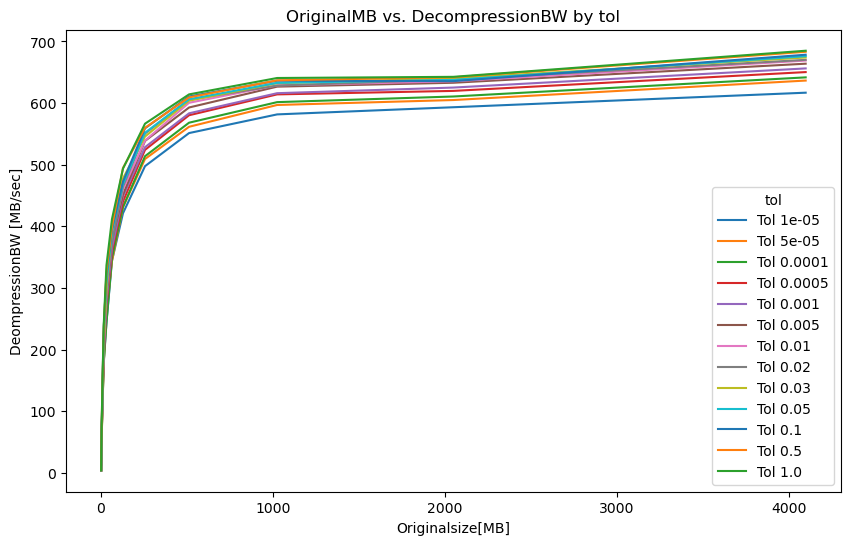

In [15]:
# Group the data by 'tol'
grouped_data = df_gpu.groupby('tol')

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each group and plot the data
for tol, group in grouped_data:
    ax.plot(group['OriginalMB'], group['decomp_bw'], label=f'Tol {tol}')

# Add labels and a legend
ax.set_xlabel('Originalsize[MB]')
ax.set_ylabel('DeompressionBW [MB/sec]')
ax.set_title('OriginalMB vs. DecompressionBW by tol')
ax.legend(title='tol')

# Show the plot
plt.show()

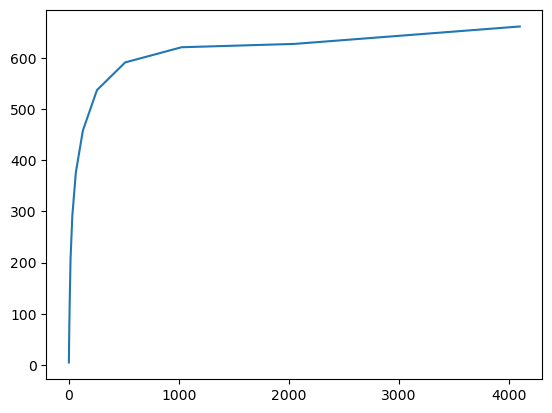

In [17]:
grouped_data = df_gpu.groupby("OriginalMB")
decomp_mean = grouped_data.agg({'decomp_bw':'mean'})
plt.plot(decomp_mean.index, decomp_mean)
plt.show()